# Practical session 2 - Practise with classic libraries

Students (pair):
- [Corentin Fleury]([link](https://github.com/jkjky))
- [Isolde Durand]([link](https://github.com/isoldedd))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [108]:
# your code
import  random as rd
rd.seed(42)
n = [rd.randint(1,100) for i in range(10)]
n
# The sequence is the same whenever we ran the cell

[82, 15, 4, 95, 36, 32, 29, 18, 95, 14]

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [109]:
import numpy as np
import  random as rd
rd.seed(42)
alpha, beta = 9, 0.5
samples = np.random.gamma(alpha, beta, 100000)
np.save("samples.npy", samples)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

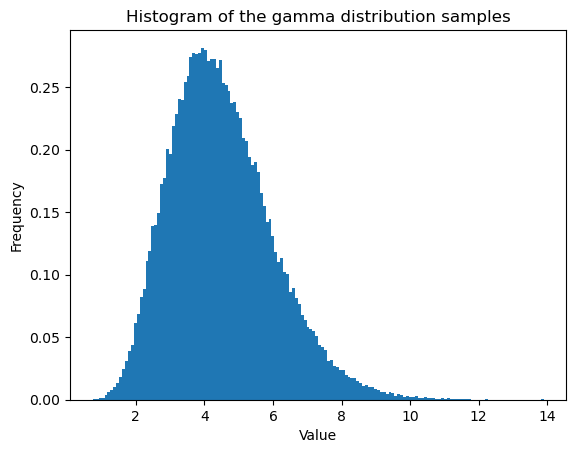

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Load samples from .npy file
samples = np.load('samples.npy')

# Plot histogram
plt.hist(samples, bins='auto', density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the gamma distribution samples')
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

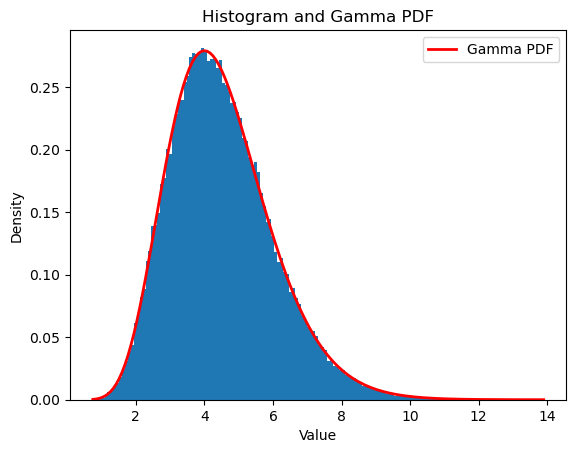

In [111]:
counts, edges, patches = plt.hist(samples, bins='auto', density=True)
length = len(edges)
points = np.linspace(edges[0], edges[-1], length)

from scipy.stats import gamma
pdf = gamma.pdf(points, a=alpha, scale=beta)
plt.plot(points, pdf, 'r-', lw=2, label='Gamma PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Gamma PDF')
plt.legend()
plt.show()

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [115]:
# your code
import numpy as np
import pandas as pd
data = pd.read_csv("data/data.csv")
# X
m_x = data["X"].mean() # mean
std_x = data["X"].std() # standard deviation
med_x = data["X"].median() # median
print(f"X : mean = {m_x}, std = {std_x}, median = {med_x}")

# Y
m_y = data["Y"].mean() # mean
std_y = data["Y"].std() # standard deviation
med_y = data["Y"].median() # median
print(f"Y : mean = {m_y}, std = {std_y}, median = {med_y}")


X : mean = 153.75, std = 59.04255014201815, median = 180.5
Y : mean = 25.916666666666668, std = 6.5151338970868204, median = 24.0


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [116]:
# your code
X = data["X"].to_numpy()
Y = data["Y"].to_numpy()
coeffs = np.polyfit(X,Y,1)
print(f" offset = {coeffs[1]}, intersect = {coeffs[0]}")

 offset = 41.0094967999913, intersect = -0.09816474883463179


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

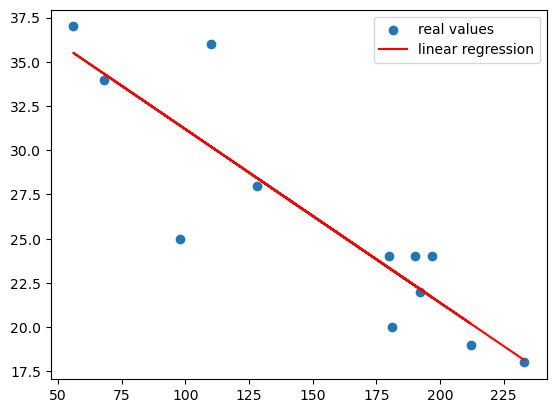

In [117]:
# your code
import matplotlib.pyplot as plt
plt.scatter(X,Y, label = 'real values')
plt.plot(X, coeffs[1]+coeffs[0]*X, label = 'linear regression', color = 'red')
plt.legend()
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [118]:
def processCode(x):
    res=np.diff(x,axis=1)
    res = np.concatenate((res, np.zeros((x.shape[0], 1))), axis=1)
    return res

def gradient2D(x):
    assert x.ndim == 2, "Input must be a 2D array"
    return (processCode(x), processCode(x.T).T)

In [119]:
gradient2D(np.array([[1, 2, 3], [4, 5, 6]]))

(array([[1., 1., 0.],
        [1., 1., 0.]]),
 array([[3., 3., 3.],
        [0., 0., 0.]]))

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [120]:
import unittest

class TestGradient(unittest.TestCase):
    def test_input_dimension(self):
        self.assertRaises(AssertionError, gradient2D, np.array([1, 2, 3]))
    def test_output_shape(self):
        x = np.array([[1, 2, 3], [4, 5, 6]])
        XDh, DvX = gradient2D(x)
        self.assertEqual(XDh.shape, x.shape)
        self.assertEqual(DvX.shape, x.shape)
    def test_value_square_matrix(self):
        x = np.ones((3, 3))
        XDh, DvX = gradient2D(x)
        zeros = np.zeros(x.shape)
        np.testing.assert_array_equal(XDh, zeros)
        np.testing.assert_array_equal(DvX, zeros)
    def test_value_rectangular_matrix(self):
        x = np.ones((2, 3))
        XDh, DvX = gradient2D(x)
        zeros = np.zeros(x.shape)
        np.testing.assert_array_equal(XDh, zeros)
        np.testing.assert_array_equal(DvX, zeros)

# Run the tests in the notebook
suite = unittest.TestLoader().loadTestsFromTestCase(TestGradient)
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [121]:
#Let's redifine previous function but with appropriate documentation

def processCodeDoc(x : np.ndarray) -> np.ndarray :
    """Return the discrete difference of a 2D matrix along the columns and append a vector of zeros at the end"""
    res=np.diff(x,axis=1)
    res = np.concatenate((res, np.zeros((x.shape[0], 1))), axis=1)
    return res

def gradient2DDoc(x : np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Return the discrete gradient of a 2D matrix as a tuple of two 2D arrays(horizontal and vertical gradients).

    Parameters
    -----------
    x : ndarray
        Input 2D array.

    Returns
    -----------
    (ndarray, ndarray)
        A tuple containing two 2D arrays: the first array is the horizontal gradient, and the second array is the vertical gradient.

    Raises
    -----------
    AssertionError
        If the input array is not 2D.

    Notes
    -----------
    Uses the processCodeDoc function to compute the discrete differences.
    """
    assert x.ndim == 2, "Input must be a 2D array"
    return (processCodeDoc(x), processCodeDoc(x.T).T)

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [122]:
def tv(x : np.ndarray) -> float:
    """Compute the total variation of a 2D array.

    Parameters
    -----------
    x : ndarray
        Input 2D array.

    Returns
    -----------
    float
        The total variation of the input array.

    Raises
    -----------
    AssertionError
        If the input array is not 2D.

    Notes
    -----------
    The total variation is computed as the sum of the square root values of thesum of squares of the horizontal and vertical gradients.
    """
    assert x.ndim == 2, "Input must be a 2D array"
    XDh, DvX = gradient2DDoc(x)
    return np.sum(np.sqrt(XDh**2 + DvX**2))

In [123]:
tv(np.array([[1, 2, 3], [4, 5, 6]]))

#XDh = array([[1., 1., 0.],
#           [1., 1., 0.]]),
#DvX = array([[3., 3., 3.],
#           [0., 0., 0.]]))
#XDh² + DvX² = array([[10., 10., 9.],
#                   [1., 1., 0.]])
#sqrt(XDh² + DvX²) = array([[sqrt(10), sqrt(10), 3.  ],
#                         [1.        , 1.        , 0.]])
#total variation = 2*sqrt(10) + 5 = 11.32455532033676

11.32455532033676

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [124]:
# your code
def processCode_adjoint(x):
    #From the definition of the adjoint operator, we have to shift the values of x to the right and then compute the negative difference except for last columns
    res = np.concatenate((np.zeros((x.shape[0], 1)), x[:,:-1]), axis=1)
    res=-np.diff(res,axis=1)
    #From the definition the last column is not a zero column but the one before last of the input
    res = np.concatenate((res, x[:,-2][:,np.newaxis]), axis=1)
    return res

def gradient2D_adjoint(x):
    assert x.ndim == 3, "Input must be a 3D array"
    assert x[0].shape == x[1].shape
    print(x[0].shape, x[1].shape)
    return processCode_adjoint(x[0])+processCode_adjoint(x[1].T).T

In [125]:
gradient2D_adjoint(np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]]))

(2, 3) (2, 3)


array([[-2., -3., -1.],
       [-3.,  1.,  8.]])

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [126]:
import unittest

class TestGradient_adjoint(unittest.TestCase):
    def test_input_dimension(self):
        self.assertRaises(AssertionError, gradient2D, np.array([1, 2, 3]))
    def test_output_shape(self):
        X =  np.ones((3, 3))
        XDh, DvX = gradient2D(X)
        self.assertEqual(XDh.shape, X.shape)
        self.assertEqual(DvX.shape, X.shape)
    @staticmethod
    def dot1_product(U,V):
        return np.trace(np.dot(np.conjugate(U), V))
    @staticmethod
    def dot2_product(U,V):
        return np.trace(np.dot(np.conjugate(U[0]), V[0])) + np.trace(np.dot(np.conjugate(U[1]), V[1]))

    def test_adjoint(self):
        X = np.ones((3, 3))
        Y = np.ones((2,3,3))
        XDh, DvX = gradient2D(X)
        DstarY = gradient2D_adjoint(Y)
        np.testing.assert_array_equal(self.dot1_product(X,DstarY), self.dot2_product([XDh,DvX],Y))



# Run the tests in the notebook
suite = unittest.TestLoader().loadTestsFromTestCase(TestGradient_adjoint)
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


(3, 3) (3, 3)


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [127]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
